## Capstone Project by Melwin Varghese P

<a href="https://github.com/melwinmpk">Github</a>

### <i>Prepare a model for the HR department to predict the Attrition and give the insights from the data about the important factors associated with the attrition so that HR can take the corrective or previntive measures to stop or control the attrition.</i>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
df = pd.read_csv('HR_Employee_Attrition_Data.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# for rows and Columns
df.shape

(2940, 35)

In [5]:
# Identifying the Type of the Data
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
# Identifying the data weather the Data has Outliers and the Skeweness of the data
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,2940.000000,2940.000000,2940.000000,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,...,2940.000000,2940.0,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000,2940.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1470.500000,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.133819,403.440447,8.105485,1.023991,0.0,848.849221,1.092896,20.325969,0.711440,1.106752,...,1.081025,0.0,0.851932,7.779458,1.289051,0.706356,6.125483,3.622521,3.221882,3.567529
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,735.750000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1470.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,2205.250000,4.000000,84.000000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2940.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<b>#Insites 1 By Looking at the data Many of the Data donot have much Outliers</b>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

<b>#Insites 2 By Looking at this data there are no missing values</b>

In [8]:
df[df.duplicated()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


<b>#Insites 3 There are no Duplicated Value as well</b>

In [9]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.005175,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.025742,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.016464,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.020950,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.005175,-0.025742,0.016464,0.020950,NaN,1.000000,0.008712,0.017377,-0.003552,-0.009020,...,-0.034827,NaN,0.031226,-0.007047,0.011953,0.005370,-0.005779,-0.004427,-0.004575,-0.004716
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.008712,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.017377,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.003552,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.009020,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [10]:
df['Attrition'].value_counts()
# 16 % of Data is Attrition

No     2466
Yes     474
Name: Attrition, dtype: int64

<AxesSubplot:ylabel='Attrition'>

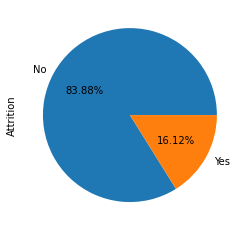

In [7]:
df['Attrition'].value_counts().plot.pie(autopct = '%1.2f%%')

#### #Insites 4 In the Given data there are only 16.12% Attrition employees data is there

In [8]:
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})
df['OverTime'] = df['OverTime'].map({'Yes':1, 'No':0})
df['Gender'] = df['Gender'].map({'Male':1, 'Female':0})
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


### EDA with respect to Department

<AxesSubplot:xlabel='Department', ylabel='count'>

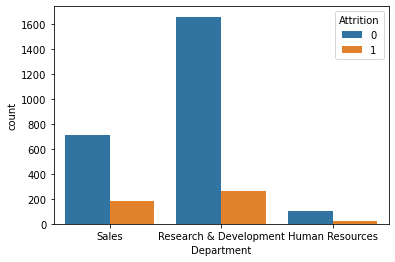

In [13]:
sns.countplot(x = df['Department'], data = df,hue='Attrition')

<b>#Insites 5  among the departements R&D is the Highest Attrition Rate next Comes Sales</b>

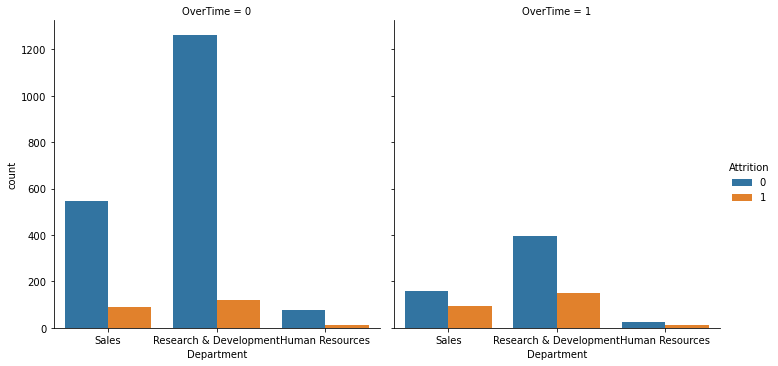

In [16]:
sns.catplot(x = 'Department', col = 'OverTime', data = df, kind = 'count', hue = 'Attrition')

<b>#Insites 6 those who are working Over time are the once chances of Attrition Rate is High </b>

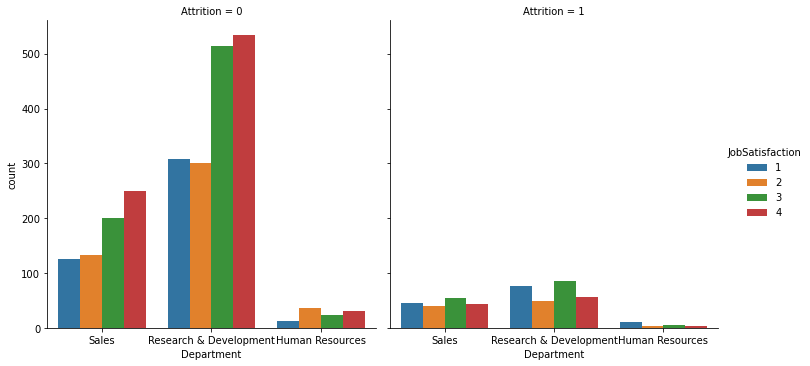

In [17]:
sns.catplot(x = 'Department', col = 'Attrition', data = df, kind = 'count', hue = 'JobSatisfaction')

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

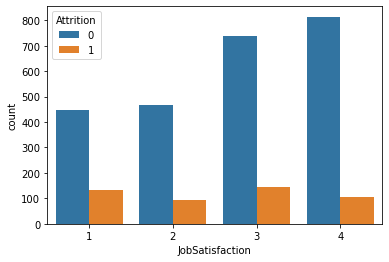

In [24]:
# sns.catplot(x = 'Department', y = 'Attrition', data = df, kind = 'bar', hue = 'JobSatisfaction')
sns.countplot(x = df['JobSatisfaction'], data = df,hue='Attrition')

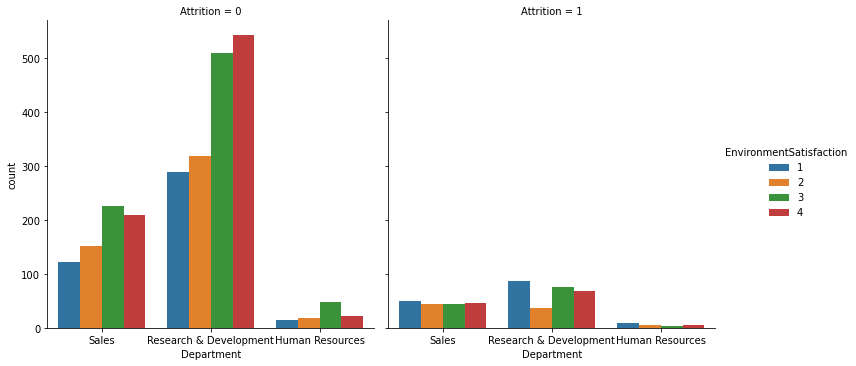

In [18]:
sns.catplot(x = 'Department', col = 'Attrition', data = df, kind = 'count', hue = 'EnvironmentSatisfaction')

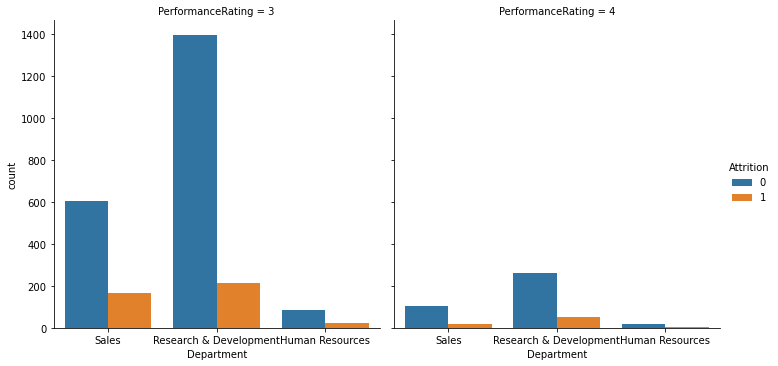

In [20]:
#PerformanceRating 
sns.catplot(x = 'Department', hue = 'Attrition', data = df, kind = 'count', col = 'PerformanceRating')

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

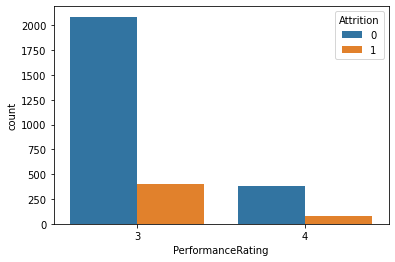

In [26]:
# sns.catplot(x = 'Department', y = 'Attrition', data = df, kind = 'bar', hue = 'PerformanceRating')
sns.countplot(x = df['PerformanceRating'], data = df,hue='Attrition')

#### #Insites 7 those who are PerformanceRating as 3 has more chances of Attrition Rate is High

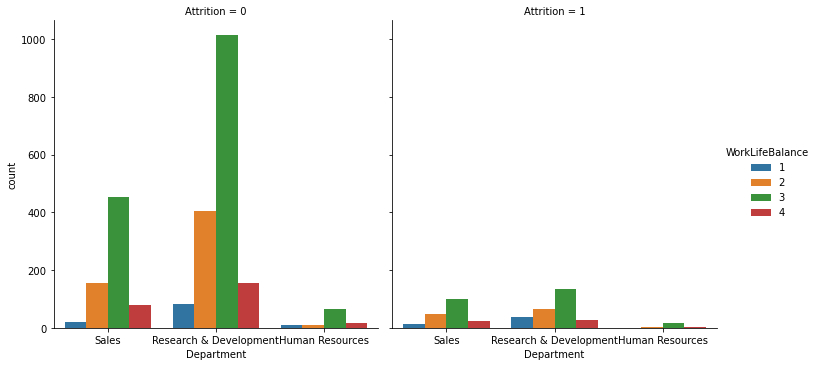

In [24]:
#WorkLifeBalance 
sns.catplot(x = 'Department', col = 'Attrition', data = df, kind = 'count', hue = 'WorkLifeBalance')

#### #Insites 8 those who have the WorkLifeBalance mentioned as 3 have higher chances of the Attrition 

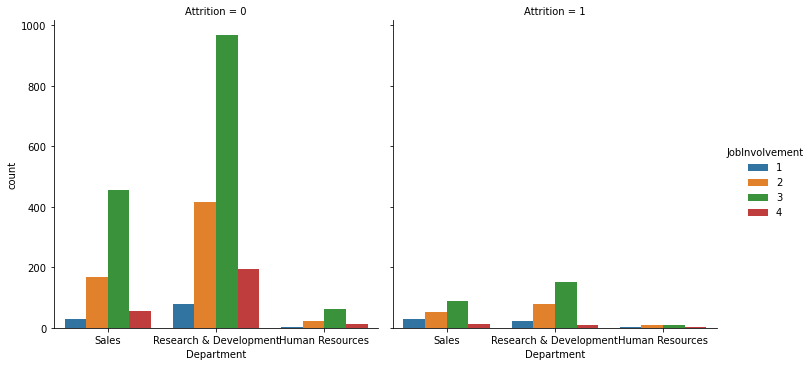

In [16]:
# sns.catplot(x = 'Department', y = '', data = df, kind = "swarm", col = "Attrition")
sns.catplot(x = 'Department', col = 'Attrition', data = df, kind = 'count', hue = 'JobInvolvement')

#### #Insites 9 those who have the JobInvolvement mentioned as 3 have higher chances of the Attrition 

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

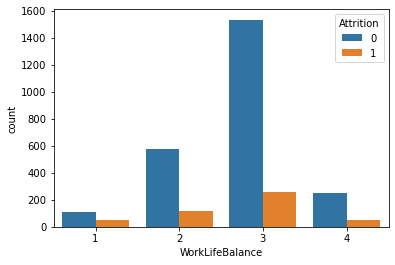

In [27]:
sns.countplot(x = df['WorkLifeBalance'], data = df,hue='Attrition')

c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 84.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\melw

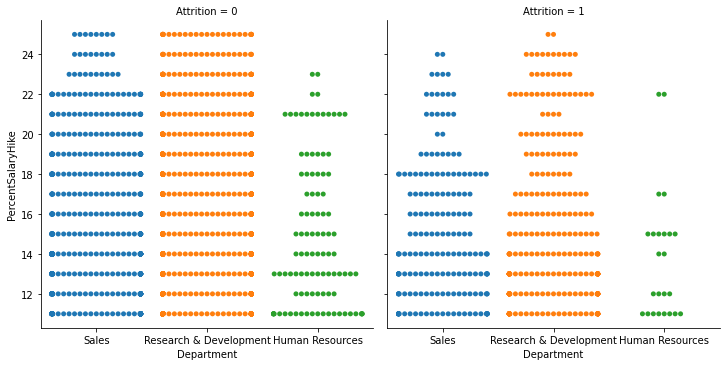

In [44]:
sns.catplot(x = 'Department', y = 'PercentSalaryHike', data = df, kind = "swarm", col = "Attrition")

#### #Insites 10 those have are less PercentSalaryHike are more likely to Attrition

c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 70.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 7.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


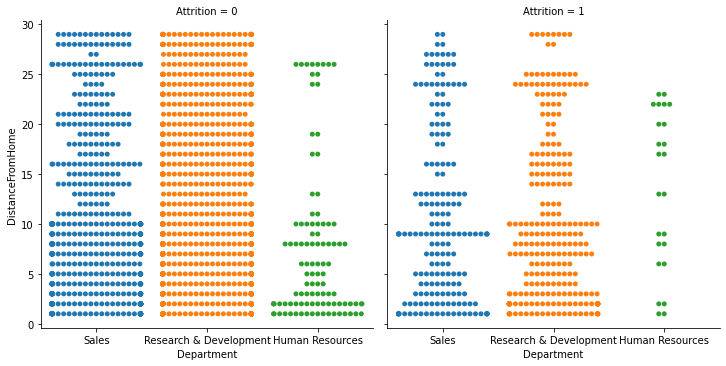

In [17]:
sns.catplot(x = 'Department', y = 'DistanceFromHome', data = df, kind = "swarm", col = "Attrition")

### CLEANING THE DATA

In [13]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        #1st quartile
        Q1 = np.percentile(df[c],25)
        #3rd quartile
        Q3 = np.percentile(df[c],75)
        #IQR
        IQR = Q3-Q1
        #Outlier Step
        outlier_step= IQR * 1  # Consedering 1.5 for 3mu which is 99% ,Consider 1 for only 2 mu which is 95 %
        #Detect outlier and their indices
        outlier_list_col = df[(df[c]<Q1 - outlier_step) | (df[c]> Q3 + outlier_step)].index
        #store indices
        outlier_indices.extend(outlier_list_col)    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,v in outlier_indices.items() if v > 0)
    
    return multiple_outliers

In [14]:
# i have not done the Out lier Removal because there were very less outliers
print(df.shape)
lst = [i for i in df.columns if i != 'Attrition']
# df = df.drop(detect_outliers(df,lst),axis=0).reset_index(drop = True) # "price",
print(df.shape)

(2940, 35)
(2940, 35)


In [9]:
def zerovariance_detection(data, features=None):
    columns = []
    zero_variance_variables = []
    columns = features if features != None else data.columns  
    for variable in columns:
        if data[variable].dtype in ['int32','int64','float32','float64']:
            if (data[variable].std() == 0):
                zero_variance_variables.append(variable)
    return zero_variance_variables            

In [10]:
### Removing the Zero Variance Column
# EmployeeCount, StandardHours
print(zerovariance_detection(df))
print(df.shape)
df = df.drop(zerovariance_detection(df),axis=1).reset_index(drop = True)
print(df.shape)

['EmployeeCount', 'StandardHours']
(2940, 35)
(2940, 33)


#### #Insites 11 as you see 'EmployeeCount', 'StandardHours' has the zero variance so these has to be removed

In [11]:
def coorilation_detection(data, features = None):
    corrmat = data.corr()
    columns = features if features != None else [ i for i in data.columns if (data[i].dtype in ['int32','int64','float32','float64'] ) ]
    coorilated_variables = {}
    for variable in columns:
        for variable1 in columns:
            if variable == variable1:
                continue
            elif abs(corrmat[variable][variable1]) >= 0.75:
                if ((variable not in coorilated_variables.keys()) and 
                    (variable1 not in coorilated_variables.keys())): 
                    coorilated_variables[variable] = []
                    coorilated_variables[variable].append(variable1)
                elif (variable1 not in coorilated_variables.keys()):  
                    coorilated_variables[variable].append(variable1)
    return coorilated_variables                
   

In [12]:
lst = [i for i in df.columns if (i != 'Attrition' and df[i].dtype in ['int32','int64','float32','float64'])]
coorilation_detection(df, lst)

{'JobLevel': ['MonthlyIncome', 'TotalWorkingYears'],
 'MonthlyIncome': ['TotalWorkingYears'],
 'PercentSalaryHike': ['PerformanceRating'],
 'YearsAtCompany': ['YearsInCurrentRole', 'YearsWithCurrManager']}

#### #Insites 12 as you see these are the highly coorilated variables so one of these has to be removed

In [13]:
# among these data we need to remove some of the colums I decided to remove these
lst_to_remove = ['YearsInCurrentRole', 'YearsWithCurrManager','PercentSalaryHike','MonthlyIncome','JobLevel']
print(df.shape)
df = df.drop(lst_to_remove,axis=1).reset_index(drop = True)
print(df.shape)

(2940, 33)
(2940, 28)


In [14]:
lst = [i for i in df.columns if (i != 'Attrition' and df[i].dtype in ['int32','int64','float32','float64'])]
coorilation_detection(df, lst)
# now every coorilated data are removed

{}

## APPLYING ML MODEL

### DECISION TREE

In [15]:
# Encoding the objects
def encoding_preprocessor(df,features = None):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    columns = features if features != None else res_df.keys()
    print("\nColums that are Encoded")
    print("----------------------------------------------------------------------")
    for column in columns:
        if df[column].dtype == 'object':
            res_df[column] = le.fit_transform(res_df[column])
            print(column)
    print("----------------------------------------------------------------------")        
    return res_df

In [16]:
encoded_df = encoding_preprocessor(df)


Colums that are Encoded
----------------------------------------------------------------------
BusinessTravel
Department
EducationField
JobRole
MaritalStatus
Over18
----------------------------------------------------------------------


In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [21]:
x = encoded_df.drop(['Attrition'],axis =1).values
y = encoded_df['Attrition'].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state=303)

### DecisionTree

In [26]:
fit_rf = DecisionTreeClassifier(random_state=303)
np.random.seed(303)
# start = time.time()

param_dist = {'max_depth': [2, 3, 4, 5, 6, 7],
              'min_samples_leaf':[100,200,70, 30],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 1)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
# end = time.time()

Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 30}


In [25]:
model_dt_2 = DecisionTreeClassifier(random_state=303, 
                                    max_depth=7, 
                                    criterion = 'entropy', 
                                    min_samples_leaf=30 )
model_dt_2.fit(x_train, y_train)
model_dt_2_score_train = model_dt_2.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)

Training score:  0.8732993197278912
Testing score:  0.8435374149659864


In [26]:
#Decision tree

model_dt = DecisionTreeClassifier(max_depth = 7, criterion = 'entropy')
model_dt.fit(x_train, y_train)
y_pred_dt = model_dt.predict_proba(x_test)[:, 1]

In [27]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

In [28]:
predictions = model_dt.predict(x_test)

# Model Accuracy
print (model_dt.score(x_test, y_test))
y_actual_result = y_test[0]

0.8775510204081632


In [29]:
for i in range(len(predictions)):
    if(predictions[i] == 1):
        y_actual_result = np.vstack((y_actual_result, y_test[i]))

In [30]:
#Recall
y_actual_result = y_actual_result.flatten()
count = 0
for result in y_actual_result:
     if(result == 1):
        count=count+1

print ("true yes|predicted yes:")
print (count/float(len(y_actual_result)))

true yes|predicted yes:
0.8035714285714286


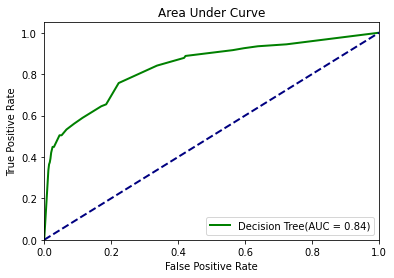

In [31]:
# Area Under the Curve 
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [32]:
print (confusion_matrix(y_test, predictions))

[[471  10]
 [ 62  45]]


In [33]:
accuracy_score(y_test, predictions)

0.8775510204081632

#### #Insites 13 by applyting the DecisionTree we were accuracy has increased little bit to 87.7%

In [48]:
def create_conf_mat(test_class_set, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

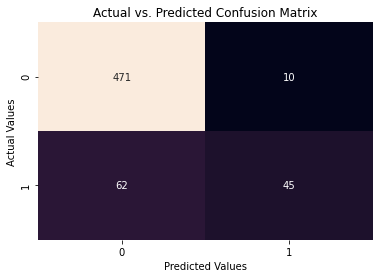

In [72]:
conf_mat = create_conf_mat(y_test, predictions)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

### RANDOM FOREST

In [18]:
from sklearn.ensemble import RandomForestClassifier
# from urllib.request import urlopen 
# from sklearn.model_selection import KFold, cross_val_score
# plt.style.use('ggplot')
# pd.set_option('display.max_columns', 500) 

In [19]:
fit_rf = RandomForestClassifier(random_state=303)

In [24]:
param_dist = {'max_depth': [ 7, 8, 9],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 1)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 9, 'max_features': None}


In [25]:
# Set best parameters given by grid search 
#Best Parameters using grid search: when n_jobs is 1
#  {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 7, 'max_features': None}
fit_rf.set_params(criterion = 'entropy',
                  max_features = None, 
                  max_depth = 9)

RandomForestClassifier(criterion='entropy', max_depth=9, max_features=None,
                       random_state=303)

#### OOB Rate

In [26]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(x_train, y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


In [27]:
# Convert dictionary to a pandas series for easy plotting 


Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

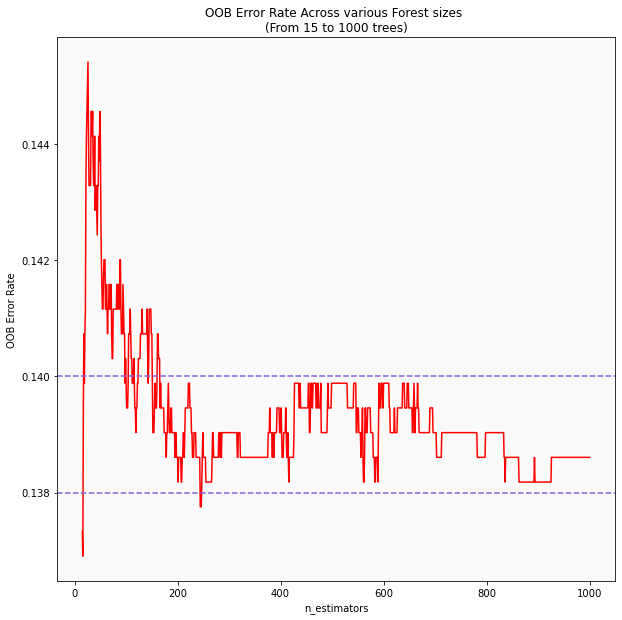

In [54]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.14, color='#875FDB',linestyle='--')
plt.axhline(0.138, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

#### #Insites 14 as per the obb rate we can select n = 300 for the 

In [58]:
print('OOB Error rate for 300 trees is: {0:.5f}'.format(oob_series[300]))

OOB Error rate for 300 trees is: 0.13903


In [40]:
fit_rf.set_params(n_estimators=300,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=None,
                       n_estimators=300, random_state=303)

In [41]:
fit_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, max_features=None,
                       n_estimators=300, random_state=303)

In [42]:
def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [43]:
var_imp_rf = variable_importance(fit_rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

In [69]:
def variable_importance_plot(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints bar chart detailing variable importance for CART model
    NOTE: feature_space list was created because the bar chart
    was transposed and index would be in incorrect order.

    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns:
    ----------
    Returns variable importance plot in descending order
    """
    index = np.arange(len(names_index))

    importance_desc = sorted(importance)
    feature_space = []
    for i in range(indices.shape[0] - 1, -1, -1):
        feature_space.append(names_index[indices[i]])

    fig, ax = plt.subplots(figsize=(10, 10))

    ax.set_fc('#fafafa') # get_fc
    plt.title('Feature importances for Random Forest Model\
    \nAttrition')
    plt.barh(index,
             importance_desc,
             align="center",
             color = '#875FDB')
    plt.yticks(index,
               feature_space)

    plt.ylim(-1, 30)
    plt.xlim(0, max(importance_desc) + 0.01)
    plt.xlabel('Mean Decrease in Impurity')
    plt.ylabel('Feature')

    plt.show()
    plt.close()

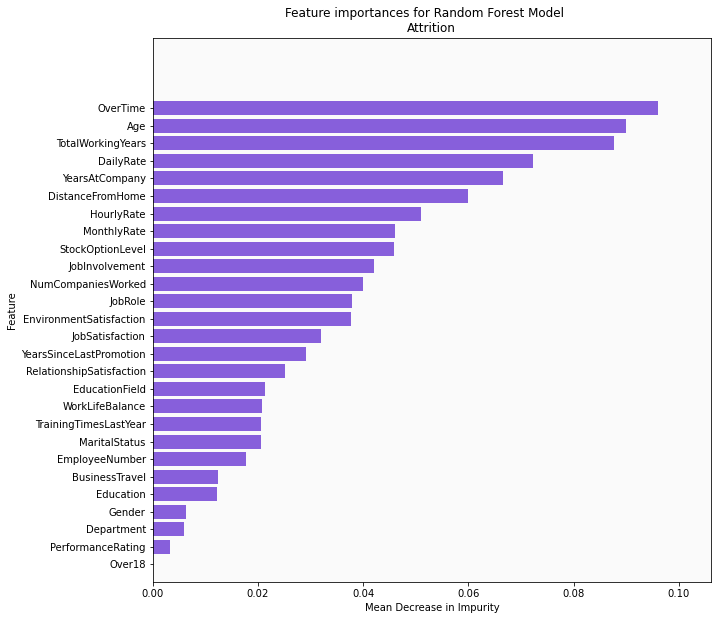

In [70]:
names_index = [i for i in df.columns if i != 'Attrition']
variable_importance_plot(importances_rf, indices_rf, names_index)

#### #Insites 15 as you see these are the Importent variables that are there

In [47]:
predictions_rf = fit_rf.predict(x_test)

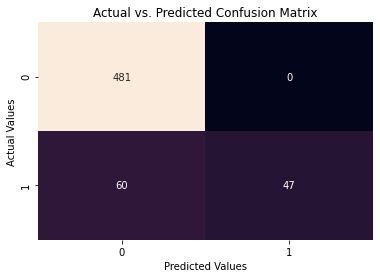

In [49]:
conf_mat = create_conf_mat(y_test, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [50]:
accuracy_rf = fit_rf.score(x_test, y_test)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy_rf))

Here is our mean accuracy on the test set:
 0.898


#### #Insites 16 by applyting the random forest we were accuracy has increased little bit to 89.8%

In [51]:
# Here we calculate the test error rate!
test_error_rate_rf = 1 - accuracy_rf
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

The test error rate for our model is:
  0.1020


### SVM

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2, random_state=303)

In [54]:
from sklearn.svm import SVC
from sklearn import metrics

In [57]:
svc=SVC() #Default hyperparameters
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8775510204081632


In [59]:
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8180272108843537


In [60]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.891156462585034


In [62]:
tuned_parameters = {
 'C': (np.arange(0.1,1,0.1)) , 'kernel': ['linear'],
 'C': (np.arange(0.1,1,0.1)) , 'gamma': [0.01,0.02,0.03,0.04,0.05], 'kernel': ['rbf'],
 'degree': [2,3,4] ,'gamma':[0.01,0.02,0.03,0.04,0.05], 'C':(np.arange(0.1,1,0.1)) , 'kernel':['poly']
                   }
svm_model= SVC()
model_svm = GridSearchCV(svm_model, tuned_parameters,cv=10,scoring='accuracy')

In [63]:
model_svm.fit(x_train, y_train)
print(model_svm.best_score_)

0.9362152902993148


In [64]:
print(model_svm.best_params_)

{'C': 0.9, 'degree': 3, 'gamma': 0.05, 'kernel': 'poly'}


In [66]:
svc=SVC(kernel='poly',gamma=0.05, degree=3, C=0.9 )
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9268707482993197


#### #Insites 17 as you see accuracy of the model Increased to 92.68% in SVM by setting kernal='poly' as a result the data is non linear

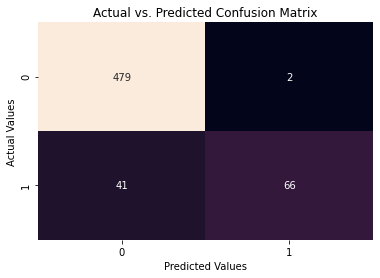

In [71]:
predictions_rf = svc.predict(x_test)
conf_mat = create_conf_mat(y_test, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()